## Creating a logistic regresssion to predict absenteeism

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [2]:
data_preprocessed = pd.read_csv('preprocessed-file.csv')

In [3]:
data_preprocessed.head()

,Reason_type_1,Reason_type_2,Reason_type_3,Reason_type_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [4]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [5]:
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

##### Declare the inputs and targets

In [6]:
data_preprocessed['Excessive absenteeism'] = targets

In [7]:
data_preprocessed.head()

,Reason_type_1,Reason_type_2,Reason_type_3,Reason_type_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [8]:
# checking the balance of classes
data_preprocessed['Excessive absenteeism'].value_counts(normalize=True)

0    0.544286
1    0.455714
Name: Excessive absenteeism, dtype: float64

In [9]:
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours','Daily Work Load Average','Distance to Work','Day of the week'], axis = 1)

In [10]:
data_with_targets.shape

(700, 12)

In [11]:
data_with_targets.iloc[:, :-1]

,Reason_type_1,Reason_type_2,Reason_type_3,Reason_type_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0
696,1,0,0,0,5,225,28,24,0,1,2
697,1,0,0,0,5,330,28,25,1,0,0
698,0,0,0,1,5,235,32,25,1,0,0


In [12]:
unscaled_inputs = data_with_targets.iloc[:, :-1]

In [13]:
len(unscaled_inputs.columns)

11

In [74]:
unscaled_inputs.columns

Index(['Reason_type_1', 'Reason_type_2', 'Reason_type_3', 'Reason_type_4',
       'Month Value', 'Transportation Expense', 'Age', 'Body Mass Index',
       'Education', 'Children', 'Pets'],
      dtype='object')

##### Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs, targets, train_size = 0.8, random_state = 20)

In [16]:
print(x_train.shape, y_train.shape)

(560, 11) (560,)


In [17]:
print(x_test.shape, y_test.shape)

(140, 11) (140,)


##### Scale the data

In [18]:
from sklearn.preprocessing import StandardScaler
absenteeism_scaler = StandardScaler()

In [19]:
scaled_x_train = absenteeism_scaler.fit_transform(x_train)

In [20]:
scaled_x_test = absenteeism_scaler.transform(x_test)

# Machine learning

## 1. Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [22]:
reg = LogisticRegression(random_state=42)

##### Train the model

In [23]:
reg.fit(scaled_x_train,y_train)

LogisticRegression(random_state=42)

In [24]:
y_hat_logit = reg.predict(scaled_x_train)

##### Model performance

In [25]:
confusion_matrix(y_train, y_hat_logit)

array([[250,  57],
       [ 64, 189]], dtype=int64)

In [26]:
accuracy_score(y_train, y_hat_logit)

0.7839285714285714

In [27]:
print(classification_report(y_train, y_hat_logit))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       307
           1       0.77      0.75      0.76       253

    accuracy                           0.78       560
   macro avg       0.78      0.78      0.78       560
weighted avg       0.78      0.78      0.78       560



##### The weight and bias

In [28]:
reg.intercept_

array([-0.23487025])

In [29]:
reg.coef_

array([[ 2.06656302,  0.37486084,  1.54399512,  1.31248316,  0.18496921,
         0.70205184, -0.19706583,  0.32628496, -0.12887747,  0.37553467,
        -0.33531437]])

In [30]:
feature_name = unscaled_inputs.columns.values

In [31]:
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)
summary_table

,Feature name,Coefficient,Odds_ratio
1,Reason_type_1,2.066563,7.897632
2,Reason_type_2,0.374861,1.454789
3,Reason_type_3,1.543995,4.683263
4,Reason_type_4,1.312483,3.715388
5,Month Value,0.184969,1.203181
6,Transportation Expense,0.702052,2.017889
7,Age,-0.197066,0.821137
8,Body Mass Index,0.326285,1.385810
9,Education,-0.128877,0.879082
10,Children,0.375535,1.455770


## 2. Support Vector machines

### a) Linear svm classification

In [32]:
lsvm_reg = LinearSVC(C=1, loss='hinge', random_state=42, max_iter=10000)

In [33]:
lsvm_reg.fit(scaled_x_train,y_train)

LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42)

In [34]:
y_hat_lsvm = lsvm_reg.predict(scaled_x_train)

##### Model performance

In [35]:
confusion_matrix(y_train, y_hat_lsvm)

array([[252,  55],
       [ 77, 176]], dtype=int64)

In [36]:
accuracy_score(y_train, y_hat_lsvm)

0.7642857142857142

In [37]:
print(classification_report(y_train, y_hat_lsvm))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       307
           1       0.76      0.70      0.73       253

    accuracy                           0.76       560
   macro avg       0.76      0.76      0.76       560
weighted avg       0.76      0.76      0.76       560



### b) Non-linear svm classification

#### Gaussian rbf kernel

In [38]:
rbf_reg = SVC(kernel='rbf', random_state=42, C=1, gamma=5)

In [39]:
rbf_reg.fit(scaled_x_train, y_train)

SVC(C=1, gamma=5, random_state=42)

In [40]:
y_hat_rbf = rbf_reg.predict(scaled_x_train)

##### Model prediction

In [41]:
confusion_matrix(y_train, y_hat_rbf)

array([[282,  25],
       [ 32, 221]], dtype=int64)

In [42]:
accuracy_score(y_train, y_hat_rbf)

0.8982142857142857

In [43]:
print(classification_report(y_train, y_hat_rbf))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       307
           1       0.90      0.87      0.89       253

    accuracy                           0.90       560
   macro avg       0.90      0.90      0.90       560
weighted avg       0.90      0.90      0.90       560



## 3. Random Forest

In [59]:
rnd = RandomForestClassifier(n_estimators=10, max_leaf_nodes=4, n_jobs=-1)

In [60]:
rnd.fit(scaled_x_train, y_train)

RandomForestClassifier(max_leaf_nodes=4, n_estimators=10, n_jobs=-1)

In [78]:
# Relative importance of each feature
for name, score in zip(unscaled_inputs, rnd.feature_importances_):
    print(name, score)

Reason_type_1 0.19436390503702397
Reason_type_2 0.0
Reason_type_3 0.1462881090753995
Reason_type_4 0.2622269850221166
Month Value 0.03176284036300218
Transportation Expense 0.1744828985308769
Age 0.031237979935444082
Body Mass Index 0.0460158448038198
Education 0.0
Children 0.11362143723231696
Pets 0.0


In [64]:
y_hat_rnd = rnd.predict(scaled_x_train)

##### Model prediction

In [65]:
confusion_matrix(y_train, y_hat_rnd)

array([[240,  67],
       [ 85, 168]], dtype=int64)

In [66]:
accuracy_score(y_train, y_hat_rnd)

0.7285714285714285

In [67]:
print(classification_report(y_train, y_hat_rnd))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       307
           1       0.71      0.66      0.69       253

    accuracy                           0.73       560
   macro avg       0.73      0.72      0.72       560
weighted avg       0.73      0.73      0.73       560



Training Logistic Regression...
Training SVM (Linear)...
Training SVM (rbf)...
Training Random Forest...


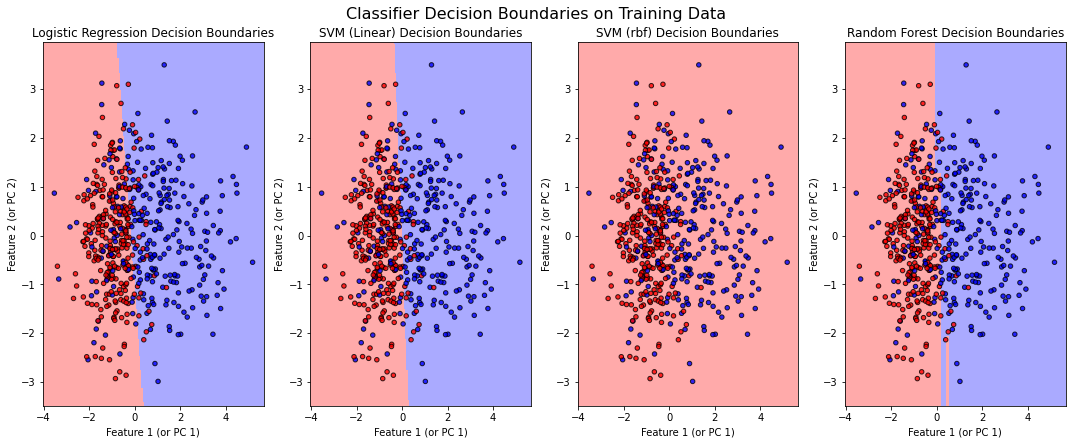

In [68]:
scaled_x_train, y_train = make_classification(n_samples = 560, n_features = 11, n_redundant =0, n_classes =2, n_clusters_per_class =1, random_state=42)
# prepare x for 2D plotting
if scaled_x_train.shape[1] > 2:
    print(f"Warning: scaled_x_train has {scaled_x_train.shape[1]} features. "
          f"Use PCA to reduce to 2 components for visualization.")
    pca = PCA(n_components=2, random_state=42)
    X_plot = pca.fit_transform(scaled_x_train)
else:
    print("scaled_x_train has 2 features. Using them directly for visualization.")
    X_plot = scaled_x_train

#Define colormaps dynamically based on the number of unique classes in y_train
# For decision regions (light colors)
colors_light = ['#FFAAAA', '#AAAAFF'] # Light red, Light blue
cmap_light = ListedColormap(colors_light[:len(np.unique(y_train))])
# For data points (bold colors)
colors_bold = ["#FF0000", "#0000FF"] # Red, Blue
cmap_bold = ListedColormap(colors_bold[:len(np.unique(y_train))])

# Training the classes
classifiers={
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM (Linear)": LinearSVC(C=1, loss='hinge', random_state=42, max_iter=10000),
    "SVM (rbf)": SVC(kernel='rbf', random_state=42, C=0.001, gamma=5),
    "Random Forest": RandomForestClassifier(n_estimators=10, max_leaf_nodes=4, n_jobs=-1)
}
plt.figure(figsize=(15,6))

# Plot the decision boundary for each classifier
for i, (name, classifier) in enumerate(classifiers.items()):
    print(f"Training {name}...")
    classifier.fit(X_plot, y_train) # Train on the 2D data for visualization

    # Create a mesh to plot in
    # Add a small buffer to the min/max for better visualization
    x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
    y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), # Increased step for faster plotting, adjust if needed
                         np.arange(y_min, y_max, 0.05))

    # Predict class for each point in the mesh
    # np.c_ concatenates arrays along the second axis (columns)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(1, len(classifiers), i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot the training points
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20, alpha=0.8) # Added alpha for better visibility
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"{name} Decision Boundaries")
    plt.xlabel(f"Feature 1 (or PC 1)")
    plt.ylabel(f"Feature 2 (or PC 2)")

plt.tight_layout()
plt.suptitle("Classifier Decision Boundaries on Training Data", y=1.02, fontsize=16) # Overall title
plt.show()


### Testing the best model

In [69]:
y_hat_test = rnd.predict(x_test.values)

#### Model Evaluation 

In [70]:
confusion_matrix(y_test,y_hat_test)

array([[53, 21],
       [20, 46]], dtype=int64)

In [71]:
accuracy_score(y_test, y_hat_test)

0.7071428571428572

In [72]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72        74
           1       0.69      0.70      0.69        66

    accuracy                           0.71       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.71      0.71      0.71       140



### Save the model

In [79]:
import pickle

In [80]:
with open('model', 'wb') as file:
    pickle.dump(rnd,file)

In [81]:
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)